# TO DO
### Add w_0 parameter into parameter dict - DONE
### Vary each parameter where other are fixed from specific values - DONE however not really working
Originally intend to do this by having a list of each values in the dict but not sure how to go about using this in the function, think it's actually easier to for each parameter to be varied, create a list of dicts which varies that parameter

### Perhaps using OO to create a data vector class
Would include a method that calculates what the vector looks like, loop over this method for each index of parameter dict list
Does this actually achieve anything though?

In [8]:
import numpy as np
import pyccl as ccl
import pylab as plt

In [9]:
#Set up lists parameter dictionaries for each parameter that will be varied, with the rest fixed
params_omegc = [{'Omega_c': 0.25, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.275, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.3, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 }]

params_omegb = [{'Omega_c': 0.27, 'Omega_b': 0.035, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.0475, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.0600, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 }]

params_h = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.65, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
            {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.70, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
            {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.75, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 }]

params_sig8 = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.79, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.82, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.85, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 }]

params_bias = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [0.9, 1.05, 1.2, 1.35, 1.5], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.5, 1.75, 2.0, 2.25, 2.5], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 }]

params_sig0 = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': -0.5 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
               {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0.5 }]

params_mu0 = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': -1.0, 'sigma_0': 0 },\
              {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 0, 'sigma_0': 0 },\
              {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': 0, 'mu_0': 1.0, 'sigma_0': 0 }]

params_w0 = [{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': -1, 'mu_0': 0, 'sigma_0': 0 },\
              {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': -0.85, 'mu_0': 0, 'sigma_0': 0 },\
              {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': [1.2, 1.4, 1.6, 1.8, 2.0], 'w0': -0.7, 'mu_0': 0, 'sigma_0': 0 }]

In [10]:
def data_vector(params):
    '''This function takes a parameter argument which is a list of dictionaries used to vary one specific parameter,
    it then calculates the data vectors for each dict and plots them on the same matplotlib figure, allowing for the
    effects of varying each cosmological parameter on the data vectors form to be analysed'''
    
    cosmo = ccl.Cosmology(Omega_c = params['Omega_c'],\
                          Omega_b = params['Omega_b'],\
                          h = params['h'],\
                          sigma8 = params['sigma8'],\
                          n_s = params['n_s'],\
                          w0 = params['w0'],\
                          mu_0 = params['mu_0'],\
                          sigma_0 = params['sigma_0'],\
                          matter_power_spectrum = 'linear')
    
    #Load in lensing and clustering distributions and ell
    dNdz_lens = np.loadtxt('dNdz_srcs_LSSTSRD_Y1.dat') 
    dNdz_clust = np.loadtxt('dNdz_clust_LSSTSRD_Y1.dat')
    ell = np.loadtxt('ell-values')
    
    #Construct tracer objects
    tracers_clust = []
    tracers_lens = []
    
    for i in range(5):
        tracers_clust.append(ccl.NumberCountsTracer(cosmo,\
                                                    has_rsd=False,\
                                                    dndz=(dNdz_clust[:,0],\
                                                    dNdz_clust[:,i+1]),\
                                                    bias=(dNdz_clust[:,0], params['bias'][i]*np.ones(2000))))
    
        tracers_lens.append(ccl.WeakLensingTracer(cosmo, dndz=(dNdz_lens[:,0], dNdz_lens[:,i+1])))
    
    #Now that the tracers are constructed, calculate C_l's for shear, gg-lensing and lensing
    cls_clus = []
    cls_gg = []
    cls_gg_clean = []
    gglensing = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    cls_lens = []
    

    for i in range(len(tracers_clust)):
        
        cls_clus.append(ccl.angular_cl(cosmo, tracers_clust[i], tracers_clust[i], ell))
        
        for j in range(len(tracers_clust)):
            
            cls_gg.append(ccl.angular_cl(cosmo, tracers_clust[i], tracers_lens[j], ell))
            
            if i >= j:
                cls_lens.append(ccl.angular_cl(cosmo,tracers_lens[i], tracers_lens[j], ell))
                
    for n in range(len(gglensing)):
        if gglensing[n] == 1:
            cls_gg_clean.append(cls_gg[n])

    #Clean up the data vectors shapes and combine them all
    cls_clus_gg = np.append(cls_clus, cls_gg_clean)
    cls_combined = np.append(cls_clus_gg, cls_lens)
    
    return cls_combined

In [11]:
#Create initial empty lists that can be appended to contain the vectors for each varying case
cls_omegc = []
cls_omegb = []
cls_h = []
cls_sig8 = []
cls_bias = []
cls_sig0 = []
cls_mu0 = []
cls_w0 = []

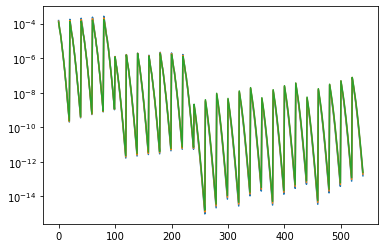

In [12]:
#Plots for varying omega_c values 
for i in range(3):
    cls_omegc.append(data_vector(params_omegc[i]))

for j in range(3):
    plt.plot(cls_omegc[j])
    
plt.yscale('log')
plt.show()

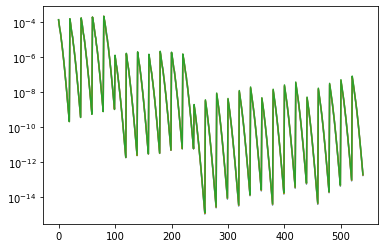

In [13]:
#Plots for varying omega_b
for i in range(3):
    cls_omegb.append(data_vector(params_omegb[i]))
    
for j in range(3):
    plt.plot(cls_omegb[j])
    
plt.yscale('log')
plt.show()

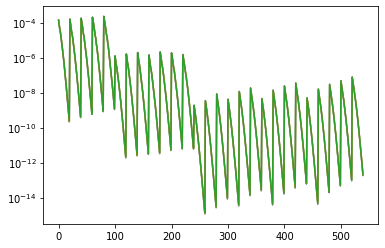

In [14]:
#Plots for varying h
for i in range(3):
    cls_h.append(data_vector(params_h[i]))

for j in range(3):
    plt.plot(cls_h[j])
    
plt.yscale('log')
plt.show()

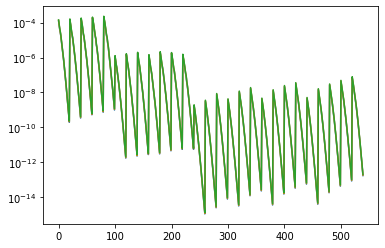

In [15]:
#Plots for varying sig8
for i in range(3):
    cls_sig8.append(data_vector(params_sig8[i]))

for j in range(3):
    plt.plot(cls_sig8[j])
    
plt.yscale('log')
plt.show()

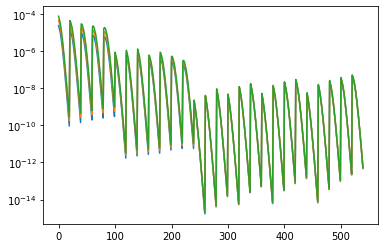

In [64]:
#Plots for varying bias
for i in range(3):
    cls_bias.append(data_vector(params_bias[i]))

for j in range(3):
    plt.plot(cls_bias[j])
    
plt.yscale('log')
plt.show()

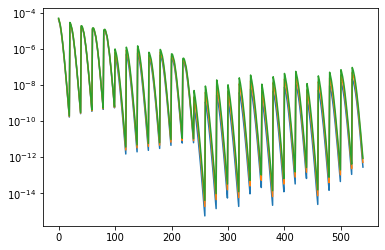

In [65]:
#Plots for varying sig0
for i in range(3):
    cls_sig0.append(data_vector(params_sig0[i]))

for i in range(3):
    plt.plot(cls_sig0[i])
    
plt.yscale('log')
plt.show()

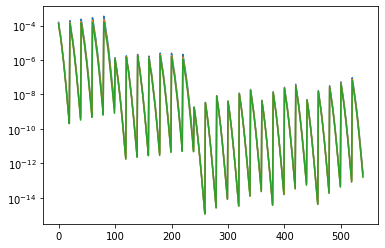

In [16]:
#plots for varying mu0
for i in range(3):
    cls_mu0.append(data_vector(params_mu0[i]))

for i in range(3):
    plt.plot(cls_mu0[i])
    
plt.yscale('log')
plt.show()

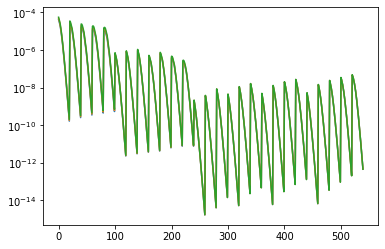

In [88]:
#Plots for varying w0
for i in range(3):
    cls_w0.append(data_vector(params_w0[i]))

for i in range(3):
    plt.plot(cls_w0[i])
    
plt.yscale('log')
plt.show()